<a href="https://colab.research.google.com/github/VARSHAMG23/ML-Algorithms/blob/main/Revenue_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
df=pd.read_csv('revenue_prediction.csv')
df.head(2)

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [36]:
df.isnull().sum()

,0
Id,0
Name,0
Franchise,0
Category,0
City,0
No_Of_Item,0
Order_Placed,0
Revenue,0


In [37]:
df.duplicated().sum()

np.int64(0)

In [38]:
df.drop_duplicates(inplace=True)

In [39]:
df.drop(columns=['Id','Name'],errors='ignore')

,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,Yes,Mexican,Bengaluru,55,5.5,5953753
1,No,Varied Menu,Gurugram,72,6.8,7223131
2,Yes,Chicken,Pune,25,1.9,2555379
3,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...
95,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,Yes,Sports Bar,Pune,25,2.1,2344689


In [40]:
# Average Revenue Generated
df['Revenue'].mean()

np.float64(4395160.9)

In [41]:
# Category Generating highest Revenue
df.groupby('Category')['Revenue'].mean().sort_values(ascending=False)

,Revenue
Category,
Asian,7.513524e+06
Healthy,5.966193e+06
Bakery Cafe,5.749800e+06
BBQ,5.542483e+06
Varied Menu,5.509978e+06
Burger,5.506968e+06
Seafood,4.491006e+06
Asian/Noodle,4.428070e+06
Pizza,4.274444e+06


In [42]:
df.groupby('Franchise')['Revenue'].mean()

,Revenue
Franchise,
No,4.252138e+06
Yes,4.512180e+06


In [43]:
# Top 5 restaurants
df.nlargest(5,'Revenue')

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
16,117,ZoesKitchen,Yes,Burger,Bengaluru,123,10.8,19696939
75,176,WhichWich,No,Bakery Cafe,Bengaluru,126,13.0,16549064
49,150,Sizzler,No,Varied Menu,Gurugram,117,8.5,8630682
24,125,Schlotzsky's,Yes,BBQ,Mumbai,110,8.8,7904084
47,148,Smashburger,No,Family Casual,Bengaluru,85,7.7,7865428


In [44]:
# Outliers
cols=list(df.columns)

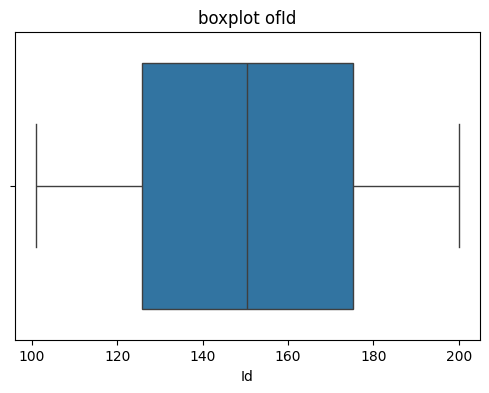

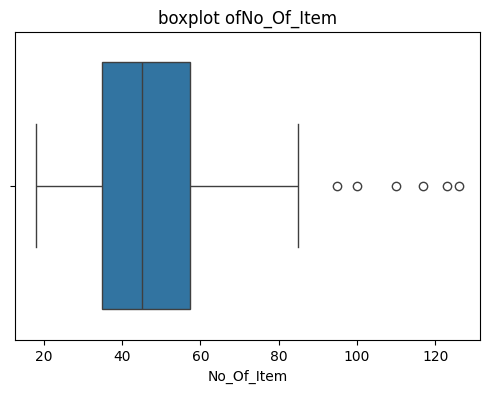

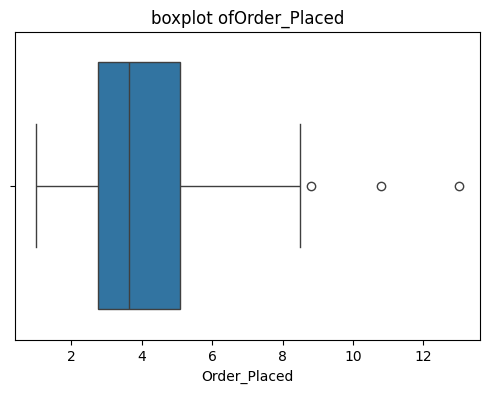

In [45]:
for i in cols:
  if df[i].dtypes != 'object' and i != 'Revenue':
    plt.figure(figsize =(6,4))
    sns.boxplot(x = df[i])
    plt.title("boxplot of" + i)
    plt.show()

In [46]:
# Data Preprocessing
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Franchise']=le.fit_transform(df['Franchise'])
df['Category']=le.fit_transform(df['Category'])
df['City']=le.fit_transform(df['City'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    int64  
 3   Category      100 non-null    int64  
 4   City          100 non-null    int64  
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 6.4+ KB


In [48]:
from re import X
# Splitting Feature and Target
X=df.drop(columns=['Revenue', 'Name', 'Id', 'City'])
y=df['Revenue']

In [49]:
X

,Franchise,Category,No_Of_Item,Order_Placed
0,1,12,55,5.5
1,0,19,72,6.8
2,1,5,25,1.9
3,1,11,18,2.5
4,1,13,48,4.2
...,...,...,...,...
95,0,11,19,1.1
96,1,19,75,6.3
97,1,19,77,6.2
98,1,17,25,2.1


In [50]:
y

,Revenue
0,5953753
1,7223131
2,2555379
3,2175511
4,4816715
...,...
95,1270499
96,6412623
97,6694797
98,2344689


In [52]:
# Standardization
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_scaled=Scaler.fit_transform(X)

In [57]:
# split the dataset into training and testing set

from sklearn.model_selection import  train_test_split

In [54]:
#1 linear regression
from sklearn.linear_model import LinearRegression

In [59]:
x_train ,x_test, y_train , y_test = train_test_split(x_scaled, y, test_size = 0.2,random_state = 42)

In [60]:
lr = LinearRegression()

In [61]:
lr.fit(x_train, y_train)

LinearRegression()

In [62]:
y_pred_lr = lr.predict(x_test)

In [67]:
# Testing Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [68]:
print(f"Linear Regression - \n MAE : {mae_lr :.2f} \n {mse_lr :.2f} \n {r2_lr :.2f}")

Linear Regression - 
 MAE : 357993.69 
 201217122389.73 
 0.86


In [69]:
# 2. Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=42)

In [70]:
dt.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [71]:
dt_pred=dt.predict(x_test)


In [72]:
# Metric
mae_dt = mean_absolute_error(y_test, dt_pred)
mse_dt = mean_squared_error(y_test, dt_pred)
r2_dt = r2_score(y_test, dt_pred)

In [73]:
print(f"Decision Tree Regressor - \n MAE : {mae_dt :.2f} \n {mse_dt :.2f} \n {r2_dt :.2f}")

Decision Tree Regressor - 
 MAE : 742471.55 
 969103132900.15 
 0.34


In [74]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=42)

In [76]:
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [77]:
pred_rf=rf.predict(x_test)

In [78]:
# metric
mae_rf = mean_absolute_error(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)
r2_rf = r2_score(y_test, pred_rf)

In [79]:
print(f"Random Forest Regressor - \n MAE : {mae_rf :.2f} \n {mse_rf :.2f} \n {r2_rf :.2f}")

Random Forest Regressor - 
 MAE : 446675.22 
 325867720140.22 
 0.78


In [81]:
# SVM
from sklearn.svm import SVR
svm=SVR(kernel='rbf')

In [82]:
svm.fit(x_train, y_train)

SVR()

In [83]:
pred_sv=svm.predict(x_test)

In [86]:
mae=mean_absolute_error(y_test, pred_sv)
mse=mean_squared_error(y_test, pred_sv)
r2=r2_score(y_test, pred_sv)

In [87]:
print(f"SVM Regressor - \n MAE : {mae :.2f} \n {mse :.2f} \n {r2 :.2f}")

SVM Regressor - 
 MAE : 982909.47 
 1464286285391.65 
 -0.00


In [88]:
models_scores  ={
    "linear regression": {'MAE': mae_lr, "MSE" :mse_lr , "r2_score":r2_lr},
    "Decision Tree" : {'MAE': mae_dt, "MSE" :mse_dt , "r2_score":r2_dt},
    "Random_Forest" : {'MAE': mae_rf, "MSE" :mse_rf , "r2_score":r2_rf}
}


In [91]:
score_df = pd.DataFrame(models_scores).T
score_df

,MAE,MSE,r2_score
linear regression,357993.689876,2.012171e+11,0.862581
Decision Tree,742471.550000,9.691031e+11,0.338160
Random_Forest,446675.220500,3.258677e+11,0.777452


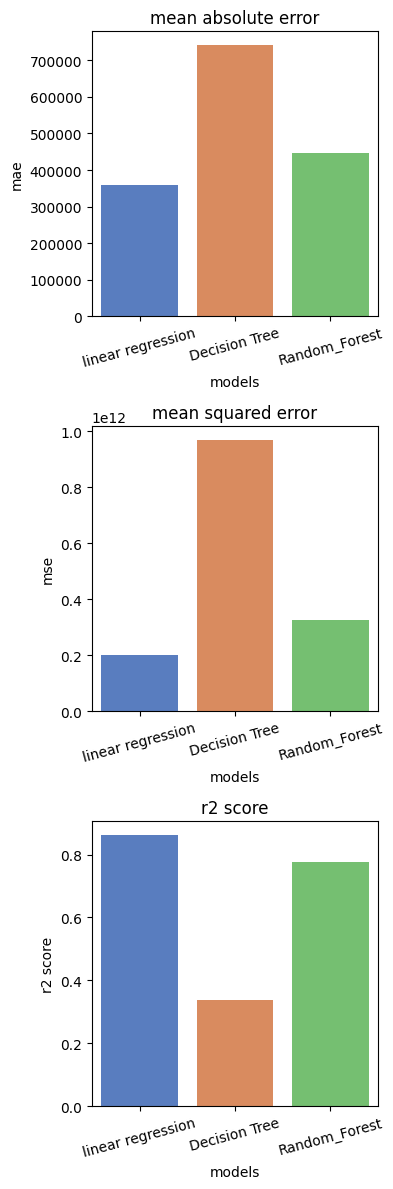

In [90]:
plt.figure(figsize=(4, 12))
# plot for mae

plt.subplot(3,1,1)
sns.barplot(x= score_df.index, y =score_df['MAE'], hue = score_df.index, palette='muted' , legend = False)
plt.title('mean absolute error')
plt.ylabel('mae')
plt.xlabel('models')
plt.xticks(rotation = 15)

plt.subplot(3,1,2)
sns.barplot(x= score_df.index, y =score_df['MSE'], hue = score_df.index, palette='muted' , legend = False)
plt.title('mean squared error')
plt.ylabel('mse')
plt.xlabel('models')
plt.xticks(rotation = 15)

plt.subplot(3,1,3)
sns.barplot(x= score_df.index, y =score_df['r2_score'], hue = score_df.index, palette='muted' , legend = False)
plt.title('r2 score')
plt.ylabel('r2 score')
plt.xlabel('models')
plt.xticks(rotation = 15)
plt.tight_layout()

In [92]:
# model with lowest mae

best_mae_model = score_df['MAE'].idxmin()

print(f" best model based on MAE {best_mae_model} (MAE {score_df['MAE'][best_mae_model] :.2f})")

 best model based on MAE linear regression (MAE 357993.69)


In [93]:
# model with lowest mse
best_mse_model = score_df['MSE'].idxmin()

print(f" best model based on MSE {best_mse_model} (MSE {score_df['MSE'][best_mse_model] :.2f})")

 best model based on MSE linear regression (MSE 201217122389.73)


In [95]:
# model with highest r2 score
best_r2_model = score_df['r2_score'].idxmax()
print(f" best model based on r2 score {best_r2_model} (r2 score {score_df['r2_score'][best_r2_model] :.2f})")

 best model based on r2 score linear regression (r2 score 0.86)
